<h1 id="intro" style="Comic Sans MS; text-align: center; color: #FFC300">EDA analysis of the Titanic shipwreck</h1>

<div>
    <ol>
        <li><a href="#step1">Problem statement and data collection</a></li>    
        <li><a href="#step2">Exploration and data cleaning</a></li>
        <li><a href="#step3">Analysis of univariate variables</a></li>
        <li><a href="#step4">Analysis of multivariate variables</a></li>
        <li><a href="#step5">Feature engineering</a></li>
        <li><a href="#step6">Feature selection</a></li>
    </ol>
</div>


<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">1. Problem statement and data collection</h3>

In [2]:
import pandas as pd
import numpy as np

# Define the file paths
path_train_data = 'C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Titanic-shipwreck/data/raw/titanic/train_data.csv'
path_test_data = 'C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Titanic-shipwreck/data/raw/titanic/test_data.csv'
path_gender_submission = 'C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Titanic-shipwreck/data/raw/titanic/gender_submission.csv'

# Load the data
train_data = pd.read_csv(path_train_data)
test_data = pd.read_csv(path_test_data)
test_survived_data = pd.read_csv(path_gender_submission)
test_data['Survived'] = test_survived_data['Survived']

# Concatenate the data
total_data = pd.concat([train_data, test_data]).reset_index(inplace=False)
"""
The reset_index(inplace=False) function is called on the concatenated DataFrame. This function resets the index of the DataFrame, and because inplace=False is specified, 
it returns a new DataFrame with the reset index. The old index is added as a column, and a new sequential index is used.
"""
total_data.drop(columns=['index'], inplace=True)
"""
The drop() function is called on the DataFrame to remove the 'index' column that was added when reset_index() was called. The inplace=True argument means that the DataFrame 
is modified in place (i.e., no new DataFrame is returned). After this line, total_data is a DataFrame that contains the combined data from the two CSV files, 
with a sequential index and no 'index' column.
"""
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3 id="step2" style="font-family: Comic Sans MS; color: #68FF33">2. Exploration and data cleaning</h3>

In [3]:
# Obtain dimensions (How many rows and columns are in the data?)
total_data.shape

(1309, 12)

In [4]:
# Obtain the information of the data and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


<ul style="color: pink">
    <li>There are a total of 1309 rows (in this case, people) and 12 columns, among which we find the target or class to predict, <em><strong>Survived</strong></em>.</li>
    <li>The variable <em><strong>Cabin</strong></em> has only 295 instances with values, so it contain more than 1000 null values. The variable <em><strong>Age</strong></em> also has null values, but in much smaller number than the previous one. The rest of the variables always have a value.</li>
    <li>The data has 7 numerical characteristics and 5 categorical characteristics</li>
</ul>

<p style="color: pink">
    A very important point to take into account in this step is to eliminate those instances that could be duplicated in the dataset. This is crucial since, if left, the same point would have several representations, which is mathematically incoherent and incorrect. To do this, we have to be smart about looking for duplicates and know in advance if and where there are duplicates before eliminating them. In addition, we have to take into account that an instance can be repeated independently of the identifier it may have, so in this case we are interested in eliminating the <em><strong>PassengerId</strong></em> variable from the analysis, since it could be wrongly generated.
</p>

In [5]:
# Check if there are duplicates
print(total_data.drop('PassengerId', axis=1).duplicated().sum())
# There are no duplicates. If we had found any, we would have removed them with the following code: total_data.drop_duplicates(inplace=True) 
print(total_data.shape)

0
(1309, 12)


<p style="color: pink">
    When we want to prepare the data to train a predictive model we must answer the following question: are all the features essential to make a prediction? Normally, that question is a resounding no. We have to try to be as objective as possible and carry out this preliminary process before the feature selection phase. Therefore, here what we will try to do is a controlled elimination of those variables that we can be sure that the algorithm will not use in the predictive process, these are <em><strong>PassngerId, Name, Ticket, and Cabin</strong></em>.
</p>

In [6]:
# Eliminate irrelevant information: 'PassengerId', 'Name', 'Ticket', 'Cabin'
total_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<strong><a href="#intro"><h4 style="font-family: Comic Sans MS; color: red; text-align: center">Go up</h4></a></strong>

<h3 id="step3" style="font-family: Comic Sans MS; color: #68FF33">3. Analysis of univariate variables</h3>

<p style="color: pink">
   A univariate variable is a statistical term used to refer to a set of observations of an attribute. That is, the column-by-column analysis of the DataFrame. To do this, we must distinguish whether a variable is categorical or numerical, as the body of the analysis and the conclusions that can be drawn will be different.
</p>

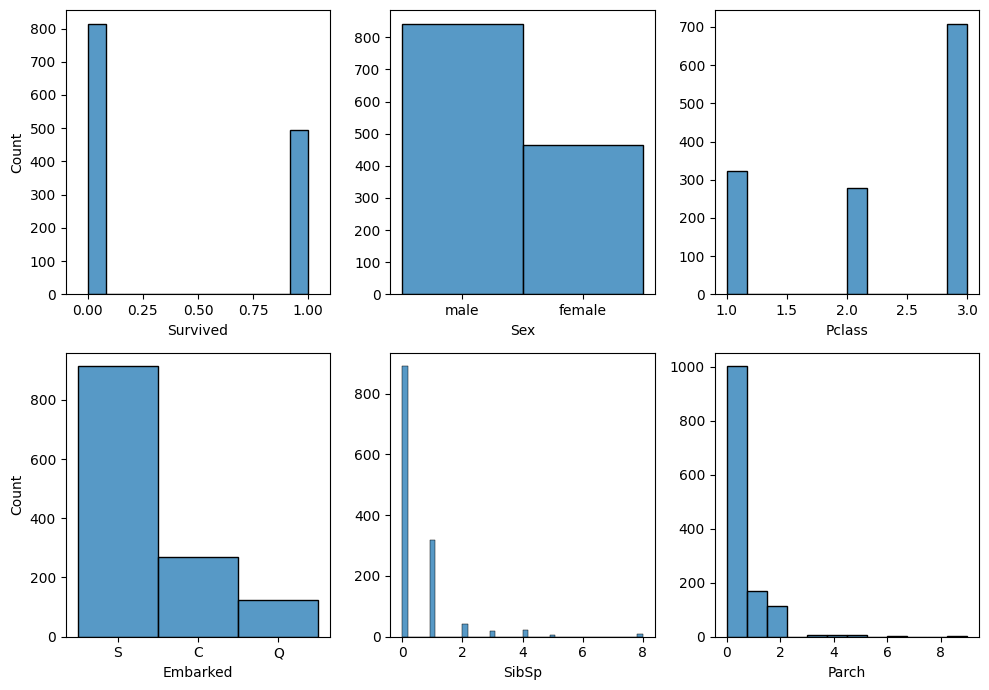

In [7]:
# Analysis of categorical variables
# Identify the categorical variables and plot them
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7)) # Create a 2x3 grid of subplots 
# axis which is a 2D numpy array containing the individual subplots (axes)
sns.histplot(ax = axis[0, 0], data=total_data, x='Survived').set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data=total_data, x='Sex').set(ylabel=None)
sns.histplot(ax = axis[0, 2], data=total_data, x='Pclass').set(ylabel=None)
sns.histplot(ax = axis[1, 0], data=total_data, x='Embarked')
sns.histplot(ax = axis[1, 1], data=total_data, x='SibSp').set(ylabel=None)
sns.histplot(ax = axis[1, 2], data=total_data, x='Parch').set(ylabel=None)

plt.tight_layout()
plt.show()

<p style="color: pink">
    With the representation of each variable we can determine that: 
    <ul style="color: pink">
        <li><em><strong>Survived</strong></em>: The number of people who did not survive outnumber those who did by more than 300.</li>
        <li><em><strong>Sex</strong></em>: There were almost twice as many men as women on the Titanic.</li>
        <li><em><strong>Pclass</strong></em>: The sum of passengers traveling in first and second class was almost identical to those traveling in third.</li>
        <li><em><strong>Embarked</strong></em>: The majority of the Titanic passengers embarked at Southhampton (S) station.</li>
        <li><em><strong>SibSp</strong></em>: More thatn 800 passengers traveled alone. The remainder with their partner or someone else from their family.</li>
        <li><em><strong>Parch</strong></em>: Almost all passengers traveled without parents or children. A small portion did.</li>
    </ul>
</p>


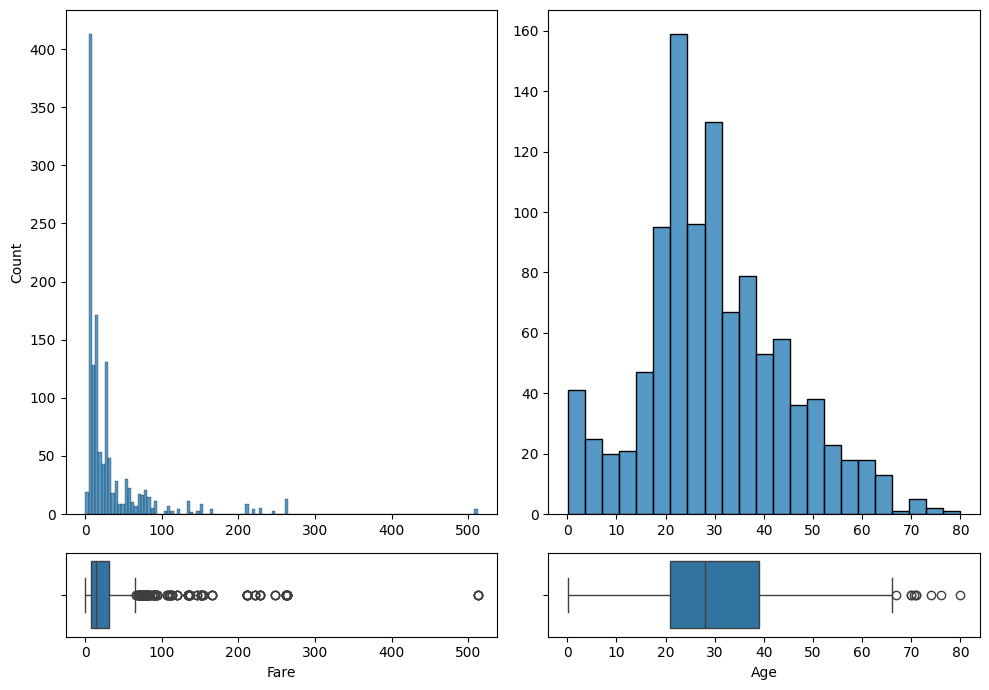

In [8]:
# Analysis of numerical variables
# Identify the numerical variables and plot them
fig, axis = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data=total_data, x='Fare').set(xlabel=None)
sns.boxplot(ax = axis[1, 0], data=total_data, x='Fare')
sns.histplot(ax = axis[0, 1], data=total_data, x='Age').set(xlabel=None, ylabel=None)
sns.boxplot(ax = axis[1, 1], data=total_data, x='Age')

plt.tight_layout()
plt.show()

<p style="color: pink">
    The combination of the two previous graphs allows us to know the distribution and its statistical characteristics. From the resulting visualization we can see that both variables have outliers that are far from the standard distribution and that their distributions are slightly unsymmetric but close to a normal distribution; the first one totally skewed to the left, where the mean is lower than the mode and the other one with a lower tendency.
</p>


<strong><a href="#intro"><h4 style="font-family: Comic Sans MS; color: red; text-align: center">Go up</h4></a></strong>

<h3 id="step4" style="font-family: Comic Sans MS; color: #68FF33">4. Analysis of multivariate variables</h3>
<a href="#41" style="font-family: Comic Sans MS; color: #68FF33">4.1 Numerical-numerical Analysis</a><br>
<a href="#42" style="font-family: Comic Sans MS; color: #68FF33">4.2 Categorical-categorical Analysis</a><br>
<a href="#43" style="font-family: Comic Sans MS; color: #68FF33">4.3 Combinations of class with various predictors</a><br>
<a href="#44" style="font-family: Comic Sans MS; color: #68FF33">4.4 Correlation analysis</a><br>
<a href="#45" style="font-family: Comic Sans MS; color: #68FF33">4.5 Numerical-categorical analysis (complete)</a><br>

<p style="color: pink">
   After analyzing the characteristics one by one, it is time to analyze them in relation to the predictor and to themselves, in order to draw clearer conclusions about their relationships and to be able to make decisions about their processing. Thus, if we would like to eliminate a variable due to a high amount of null values or certain outliers, it is necessary to first apply this process to ensure that the elimination of certain values are not critical for the survival of a passenger. For example, the variable <em><strong>Cabin</strong></em> has many null values, and we would have to ensure that there is no relationship between it and survival before eliminating it, since it could be very significant and important for the model and its presence could bias the prediction.
</p>


<h5 id=""41 style="font-family: Comic Sans MS; color: #68FF33">4.1 Numerical-numerical Analysis</h5>

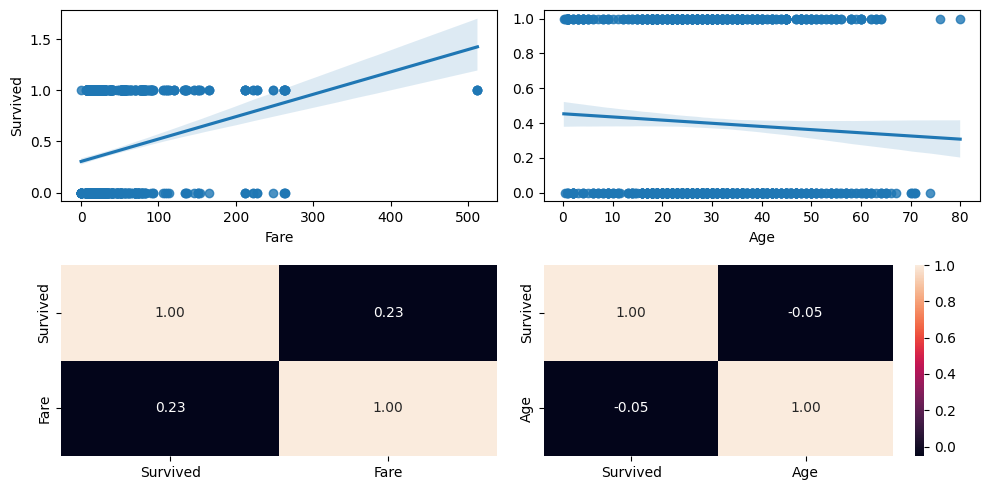

In [9]:
# Wwhen two variables have numerical data it is said numerical-numerical analysis

# 1. Survived (Fare, Age)
# Survived is categorical but coded in numbers then can be considered as numerical
fig, axis = plt.subplots(2, 2, figsize=(10, 5))
sns.regplot(ax = axis[0, 0], data=total_data, x='Fare', y='Survived')
sns.heatmap(total_data[['Survived', 'Fare']].corr(), annot=True, fmt='.2f', ax=axis[1, 0], cbar=False) # cbar=False removes the color bar
# correlation matrix of 'Survived' and 'Fare'
sns.regplot(ax = axis[0, 1], data=total_data, x='Age', y='Survived').set(ylabel=None)
sns.heatmap(total_data[['Survived', 'Age']].corr(), annot=True, fmt='.2f', ax=axis[1, 1])
# correlation matrix of 'Survived' and 'Age'
""" 
The corr() function is called on the total_data DataFrame to compute the pairwise correlation of columns, excluding NA/null values. 
The annot parameter is set to True to write the data value in each cell of the heatmap. 
The fmt parameter is set to '.2f' to control the string formatting of annotations (showing two decimal places). 
The cbar parameter is set to False, which means a colorbar will not be drawn for these heatmaps.
"""

plt.tight_layout()
plt.show()

<p style="color: pink">
    There is a direct relationship (although not very strong) between ticket price <em><strong>Fare</strong></em>. and passenger survival. Thus, some passengers with a low fare were less likely to survive than those who purchased a ticket with a higher fare. There is also a negative linear relationship, weaker than the previous one between age <em><strong>Age</strong></em> and the target variable. This makes sense considering that children were one of the groups that had a preference in using the boats for survival. <strong>In summary, despite there being some relationship with these characteristics versus the predictor, the significance is not very high, not being decisive factors on whether a passenger survived or not.</strong>
</p>


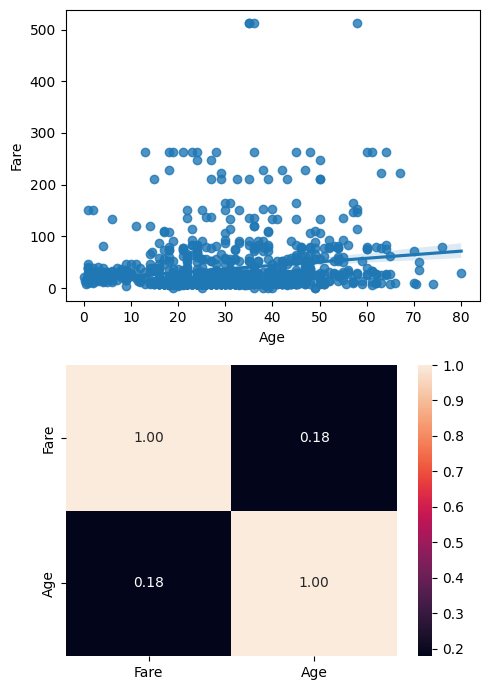

In [10]:
# 2. Fare-Age
fig, axis = plt.subplots(2, 1, figsize=(5, 7))
sns.regplot(ax = axis[0], data=total_data, x='Age', y='Fare')
sns.heatmap(total_data[['Fare', 'Age']].corr(), annot=True, fmt='.2f', ax=axis[1])

plt.tight_layout()
plt.show()

<p style="color: pink">
    It can be determined that there is not a very strong relationship between the two variables and that age has no impact on whether the ticket price is higher or not.
</p>


<h5 id="42" style="font-family: Comic Sans MS; color: #68FF33">4.2 Categorical-categorical Analysis</h5>

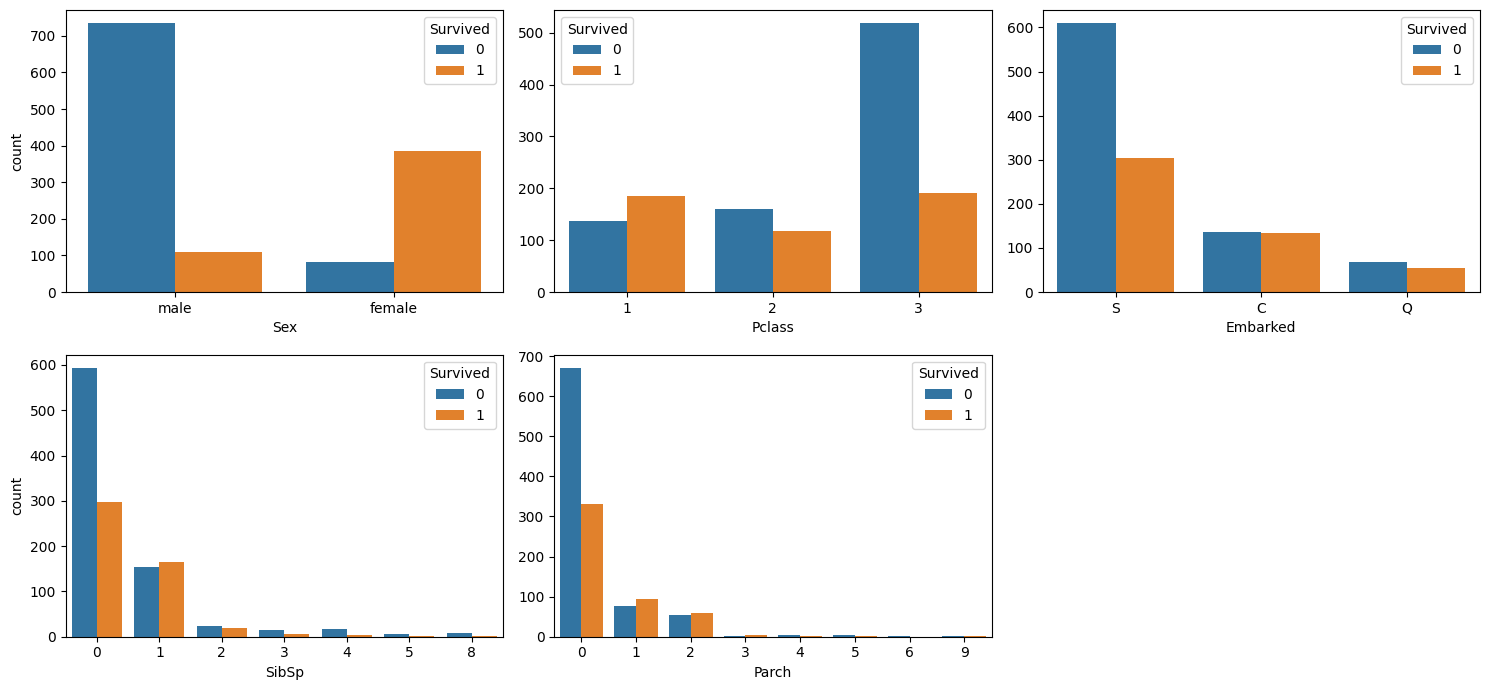

In [11]:
# When two variables have categorical data it is said categorical-categorical analysis

# 1. Survived - (Sex, Pclass, Embarked, SibSp, Parch)
fig, axis = plt.subplots(2, 3, figsize=(15, 7))
sns.countplot(ax = axis[0, 0], data=total_data, x='Sex', hue='Survived')
sns.countplot(ax = axis[0, 1], data=total_data, x='Pclass', hue='Survived').set(ylabel=None)
sns.countplot(ax = axis[0, 2], data=total_data, x='Embarked', hue='Survived').set(ylabel=None)
sns.countplot(ax = axis[1, 0], data=total_data, x='SibSp', hue='Survived')
sns.countplot(ax = axis[1, 1], data=total_data, x='Parch', hue='Survived').set(ylabel=None)
axis[1, 2].axis('off') # This line removes the empty subplot in the bottom right corner, same result with fig.delaxes(axis[1, 2])
plt.tight_layout()
plt.show()
# The hue parameter is set to 'Survived', which means the bars will be colored based on the 'Survived' column. 
# This will create separate bars for each category in 'Survived' within each 'Sex', 'PClass'...categories, allowing you to see the distribution of survival within each sex.

<p style="color: pink">
    The following conclusions can be drawn from the above graph:
    <ul style="color: pink">
    <li>With higher proportion women survived as opposed to men. This is because women had priority over men in the evacuation plans.</li>
    <li>People who traveled alone had more problems surviving than those who traveled accompanied.</li>
    <li>Those who traveled in a better class on the Titanic had a higher chance of survival.</li>
    </ul>
</p>

<h5 id="43" style="font-family: Comic Sans MS; color: #68FF33">4.3 Combinations of class with various predictors</h5>
<p style="color: pink">
    Multivariate analysis also allows combining the class with several predictors at the same time to enrich the analysis. These types of operations must be subjective and must combine related characteristics. For example, it would not make sense to perform an analysis between the class, the passenger's sex and the station where he/she boarded the Titanic, since there is no relationship between the passenger's sex and the station. However, the sex, class and sex of the passenger versus their survival could be an analysis worthy of study, among other casuistries presented below:
</p>

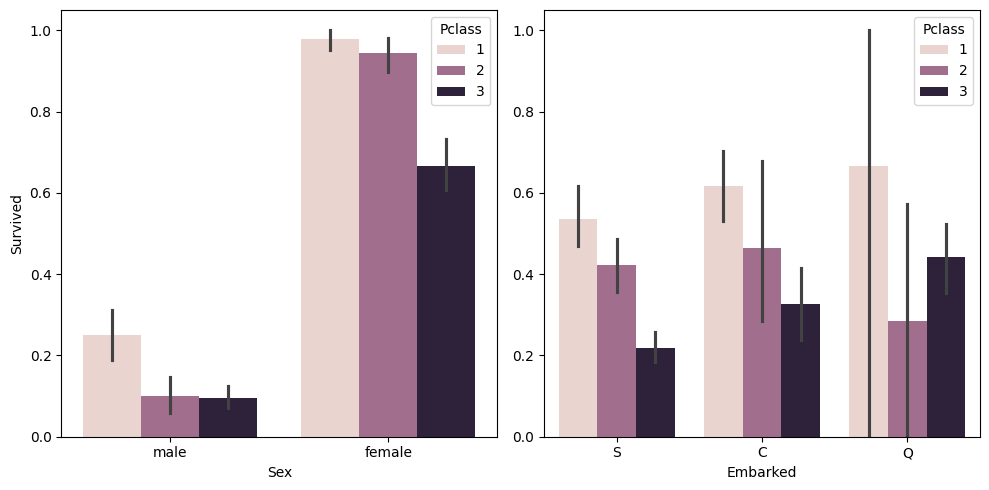

In [12]:
fig, axis = plt.subplots(figsize=(10, 5), ncols=2)
sns.barplot(ax = axis[0], data=total_data, x='Sex', y='Survived', hue='Pclass')
sns.barplot(ax = axis[1], data=total_data, x='Embarked', y='Survived', hue='Pclass').set(ylabel=None)
plt.tight_layout()
plt.show()

<p style="color: pink">
    From these analyses, it is clear that, regardless of the port of embarkation, women had a higher chance of survival regardless of the class in which they traveled, which reinforces the knowledge obtained earlier. Furthermore, on average, people who traveled in higher classes survived longer than those who did not.
</p>

<h5 id="44" style="font-family: Comic Sans MS; color: #68FF33">4.4 Correlation analysis</h5>
<p style="color: pink">
    For this analysis , we use the factorize() function from pandas to convert categorical data into numerical data. This is done because many machine learning algorithms can only handle numerical data. The factorize() function returns two objects: a label array and an array with unique values. We are only interested in the label array (at index 0), which is why we have [0] at the end of the function call. The label array represents the categorical data in numerical format. Then we create a new column in the total_data DataFrame called Sex_n, which is a numerical representation of the Sex column and the same for the Embarked column, creating a new Embarked_n column.<br>
    <br>The sns.heatmap() function from seaborn is used to plot rectangular data as a color-encoded matrix. In this case, it's used to visualize the correlation matrix of the selected features. The corr() function is used to compute pairwise correlation of columns, excluding NA/null values. The annot=True argument allows the plot to place the correlation values in each cell and fmt='.2f' argument specifies the string formatting code for these annotations.
</p>

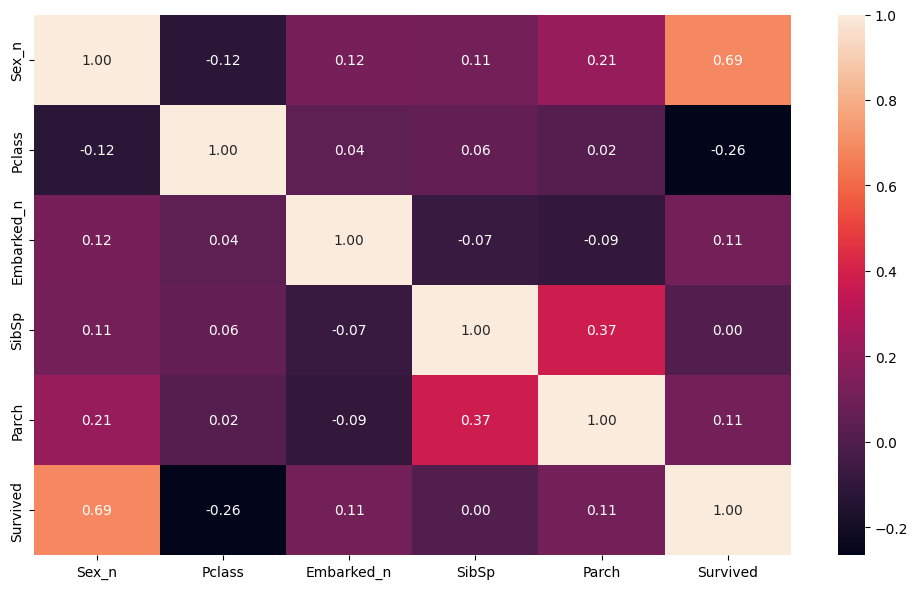

In [13]:
total_data['Sex_n'] = pd.factorize(total_data['Sex'])[0]
total_data['Embarked_n'] = pd.factorize(total_data['Embarked'])[0]

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(total_data[['Sex_n', 'Pclass', 'Embarked_n', 'SibSp', 'Parch', 'Survived']].corr(), annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

<p style="color: pink">
    The correlation analysis shows a strong direct relationship between the sex (Sex) of the passenger and his or her survival, as we have seen in previous sections. In addition, there is a relationship between the number of passengers' companions (variables SibSp and Parh). The rest of the correlations are weak and not significant enough to be included in the analysis.
</p>

<h5 id="45" style="font-family: Comic Sans MS; color: #68FF33">4.5 Numerical-categorical analysis (complete)</h5>
<p style="color: pink">
    This is the most detailed analysis we can carry out. To do this, we simply have to calculate the correlations between the variables, since this is the best indication of the relationships. Thus, once we have verified that there is a relationship, we can go deeper into the study. Another element that can be very helpful is to obtain the two-by-two relationships between all the data in the dataset. This is, in part, redundant because there are many things that we have already calculated before and so it is optional.
</p>

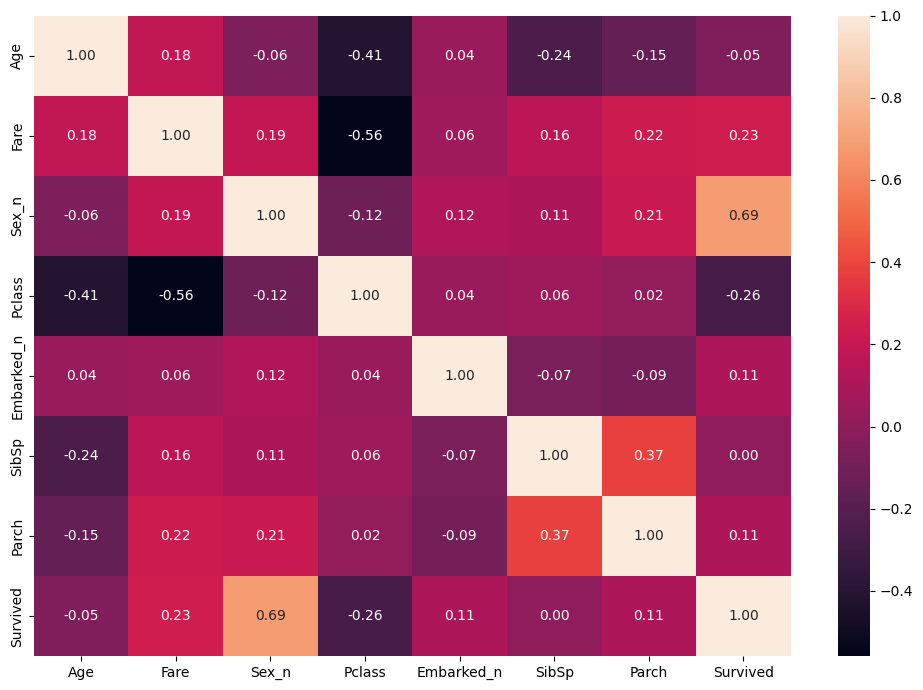

In [14]:
fig. axis = plt.subplots(figsize=(10, 7))
sns.heatmap(total_data[['Age', 'Fare', 'Sex_n', 'Pclass', 'Embarked_n', 'SibSp', 'Parch', 'Survived']].corr(), annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

<p style="color: pink">
    There is a strong negative relationship between class type (Pclass) and passenger age (Age) (those traveling in first class were very old) and between class and fare paid (Fare), which makes a lot of sense. The rest of the correlations remain the same as previously seen.<br>
    <br>Having analyzed the correlation, let us analyze the two cases seen to corroborate the theory:
</p>

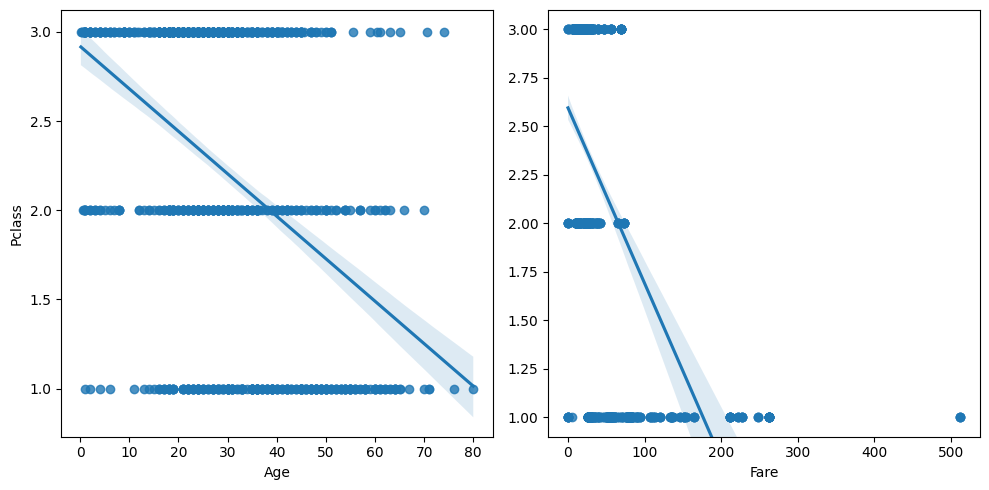

In [15]:
fig, axis = plt.subplots(figsize=(10, 5), ncols=2)
sns.regplot(ax = axis[0], data=total_data, x = 'Age', y = 'Pclass')
sns.regplot(ax = axis[1], data=total_data, x = 'Fare', y = 'Pclass').set(ylabel=None, ylim=(0.9, 3.1))
# The ylim parameter is set to (0.9, 3.1), which means the limits of the y-axis will be from 0.9 to 3.1.
plt.tight_layout()
plt.show()

<p style="color: pink">
    In the first graph we see that as age increases the presence of first class tickets becomes more noticeable, and as age decreases, third class tickets become more present, reinforcing the negative relationship between the observed variables. The second graph also reinforces what was observed, as better class tickets should be more expensive.<br>
    <br>Once the correlation has been calculated, we can draw the pairplot (this is an optional step):
</p>

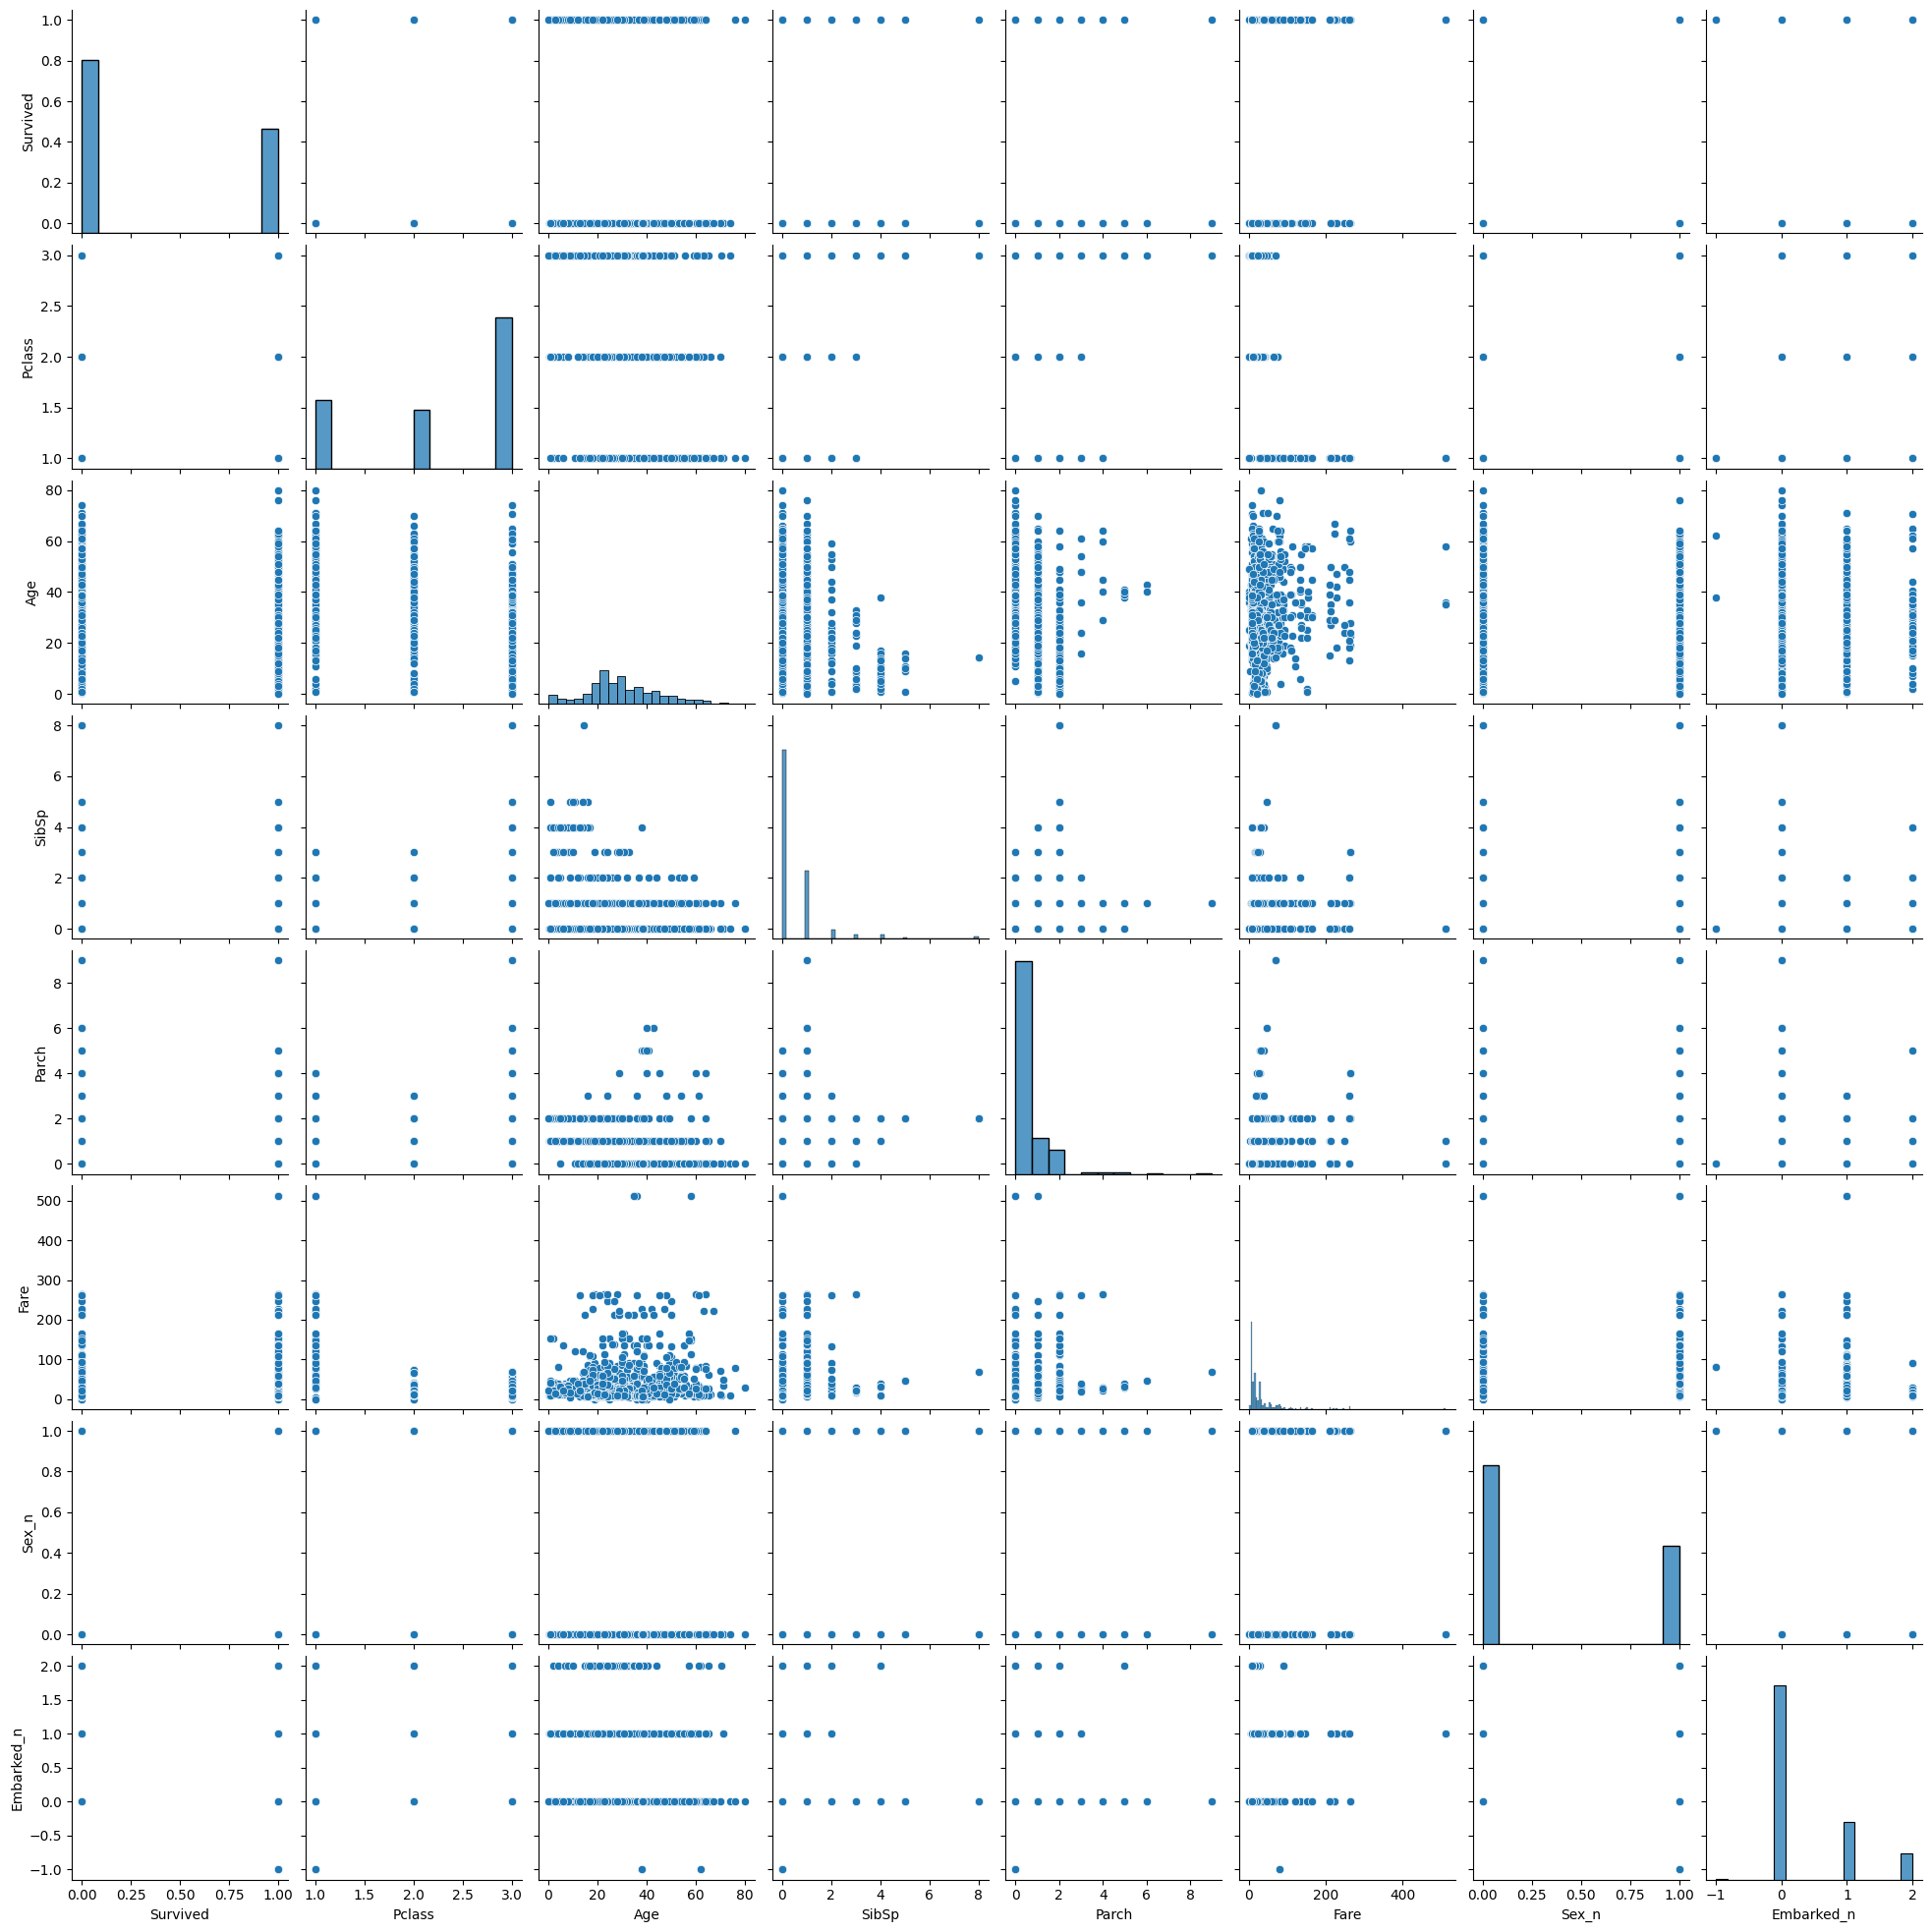

In [16]:
sns.pairplot(data = total_data)

<strong><a href="#intro"><h4 style="font-family: Comic Sans MS; color: red; text-align: center">Go up</h4></a></strong>

<h3 id="step5" style="font-family: Comic Sans MS; color: #68FF33">5. Feature engineering</h3>
<a href="#51" style="font-family: Comic Sans MS; color: #68FF33">5.1 Outlier Analysis</a><br>
<a href="#52" style="font-family: Comic Sans MS; color: #68FF33">5.2 Missing value Analysis</a><br>
<a href="#53" style="font-family: Comic Sans MS; color: #68FF33">5.3 Inference of new features</a><br>
<a href="#54" style="font-family: Comic Sans MS; color: #68FF33">5.4 Feature scaling</a><br>
<a href="#55" style="font-family: Comic Sans MS; color: #68FF33">5.5 Normalization</a><br>
<a href="#56" style="font-family: Comic Sans MS; color: #68FF33">5.6 Min-Max Scaling</a><br>

<p style="color: pink">
    Feature engineering is a process that involves the creation of new features (or variables) from existing ones to improve model performance. This may involve a variety of techniques such as normalization, data transformation, and so on. The goal is to improve the accuracy of the model and/or reduce the complexity of the model, thus making it easier to interpret.<br>
    <br>In the previous steps we have started working with the data by eliminating duplicates, accounting for null values and even, to calculate correlations, transforming Sex and Embarked into numerical categories. Although this could have been done in this step as it is part of the feature engineering, it is usually done before analyzing the variables, separating this process into a previous one and the one we are going to see next.
</p>

<h5 id="51" style="font-family: Comic Sans MS; color: #68FF33">5.1 Outlier Analysis</h5>
<p style="color: pink">
    An <strong>outlier</strong> is a data point that deviates significantly from the others. It is a value that is noticeably different from what would be expected given the general trend of the data. These outliers may be caused by errors in data collection, natural variations in the data, or they may be indicative of something significant, such as an anomaly or extraordinary event.<br>
    <br><strong>Descriptive analysis</strong> is a powerful tool for characterizing the data set: the mean, variance and quartiles provide powerful information about each variable. The describe() function of a DataFrame helps us to calculate in a very short time all these values.
</p>

In [17]:
total_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_n,Embarked_n
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479,0.355997,0.392666
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668,0.478997,0.655586
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,2.000000


<p style="color: pink">
    While experience is an important component in analyzing the results in the table above, we can use certain rules to detect them, such as looking at the minimum and maximum value of a specific characteristic and comparing it to its 25% and 75% percentile. For example, everything looks normal except for the Fare column which has a mean of 32.20 but its 50% percentile is 14 and its maximum value is 512. We could say that 512 seems to be an outlier, but it could be a transcription error. It is also possible that the most expensive bill had that price. It would be useful to do some research and confirm or disprove that information.<br>
    <br>Drawing box plots of the variables also gives us very powerful information about outliers that fall outside the confidence regions:
</p>

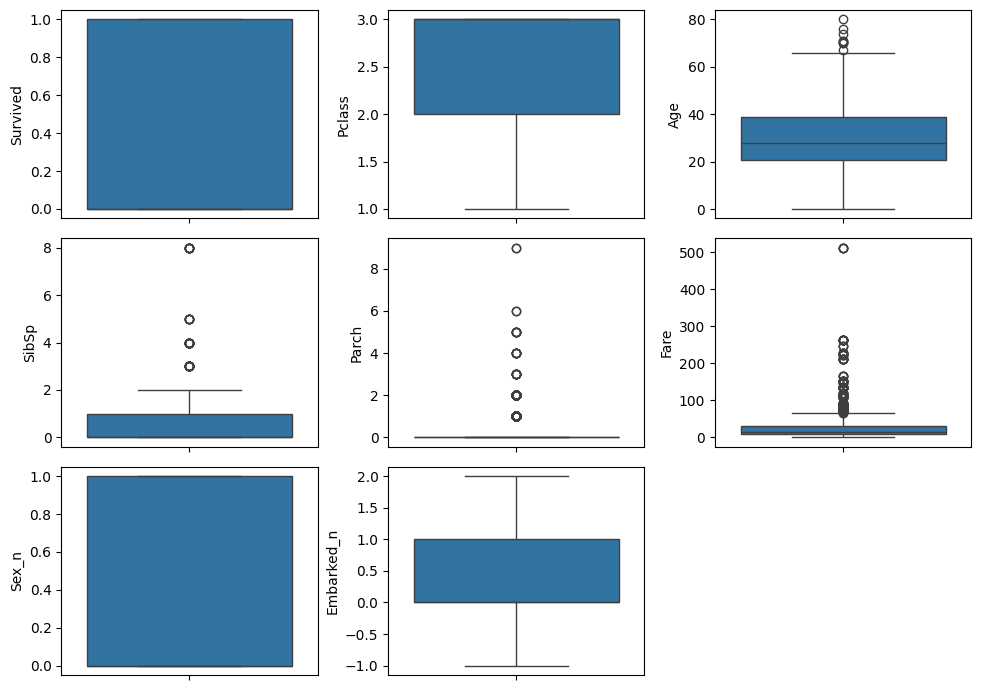

In [18]:
fig, axis = plt.subplots(3, 3, figsize=(10, 7))
sns.boxplot(ax = axis[0, 0], data=total_data, y='Survived')
sns.boxplot(ax = axis[0, 1], data=total_data, y='Pclass')
sns.boxplot(ax = axis[0, 2], data=total_data, y='Age')
sns.boxplot(ax = axis[1, 0], data=total_data, y='SibSp')
sns.boxplot(ax = axis[1, 1], data=total_data, y='Parch')
sns.boxplot(ax = axis[1, 2], data=total_data, y='Fare')
sns.boxplot(ax = axis[2, 0], data=total_data, y='Sex_n')
sns.boxplot(ax = axis[2, 1], data=total_data, y='Embarked_n')
axis[2, 2].axis('off')
plt.tight_layout()
plt.show()

<p style="color: pink">
    We can easily determine that the variables affected by outliers are <strong><em>Age, SibSp, Parch and Fare</em></strong>. In the above case about the cruise ticket (Fare column) it appears that the $512 ticket fare is not very common. We should set some upper and lower bounds to determine whether or not a data point should be considered an outlier. To deal with them there are many techniques, and we can find more information <a href="https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/how-to-deal-with-outliers.md" target="_blank">here</a>, but which can be summarized in the following points:
    <ul style="color: pink">
        <li>Maintain them. In certain Machine Learning problems, an outlier may bias the prediction towards one class or another (this is very common, for example, to detect risks). Therefore, it could be a policy that in certain cases makes sense. It is not normally used.</li>
        <li>Eliminate them. Those instances with outliers are removed from the dataset. However, if there are many outliers, this strategy may cause a large part of the available information to be lost.</li>
        <li>Replace them. If we do not want to remove entire instances due to the presence of outliers in one of their features, we can replace them by taking them into account as missing values and reusing the policy.</li>
    </ul>
</p>

In [19]:
# If we want to apply the second point from above, we can use the following code:
fare_stats = total_data['Fare'].describe()
print(fare_stats)
IQR = fare_stats['75%'] - fare_stats['25%']
upper_limit = fare_stats['75%'] + 1.5 * IQR
lower_limit = fare_stats['25%'] - 1.5 * IQR
""" 
The above calculates the Interquartile Range (IQR) and the upper and lower limits for outlier detection using the IQR method. 
The IQR is a measure of statistical dispersion and is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1).
The upper limit for outlier detection is calculated as Q3 + 1.5 * IQR, and the lower limit is calculated as Q1 - 1.5 * IQR.
"""
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(IQR, 2)}.")

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64
The upper and lower limits for finding outliers are 66.34 and -27.17, with an interquartile range of 23.38.


<p style="color: pink">
    Based on these results, we should eliminate the records of passengers whose ticket amount exceeds $65. However, our criteria is very important here and, according to the prices we saw in the box plot, the most extreme values are above 300. Let's see how many values represent that extreme value of 512:
</p>

In [20]:
total_data[total_data['Fare'] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
258,1,1,female,35.0,0,0,512.3292,C,1,1
679,1,1,male,36.0,0,1,512.3292,C,0,1
737,1,1,male,35.0,0,0,512.3292,C,0,1
1234,1,1,female,58.0,0,1,512.3292,C,1,1


<p style="color: pink">
    In this case we see that all of them survived, perhaps there is indeed a real impact on the very high ticket price and the final survival. Therefore, added to the univariate analysis above, there is an implication between the ticket price and the final survival outcome, <strong>so we decide that we keep the outliers</strong>.
</p>

<h5 id="52" style="font-family: Comic Sans MS; color: #68FF33">5.2 Missing value Analysis</h5>
<p style="color: pink">
    A missing value is a space that has no value assigned to it in the observation of a specific variable. These types of values are quite common and can arise for many reasons. For example, there could be an error in data collection, someone may have refused to answer a question in a survey, or it could simply be that certain information is not available or not applicable. The isnull() function is a powerful tool for obtaining this information:
</p>

In [21]:
total_data.isnull().sum().sort_values(ascending=False)
# Missing values in those columns, sorted from highest to lowest

Age           263
Embarked        2
Fare            1
Survived        0
Pclass          0
Sex             0
SibSp           0
Parch           0
Sex_n           0
Embarked_n      0
dtype: int64

<p style="color: pink">
    In addition, we can divide that result by the length of our DataFrame (number of rows) to get the percentage of missing values in each column. Missing values are usually represented as Nan, Null or None in the dataset:
</p>

In [22]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

Age           0.200917
Embarked      0.001528
Fare          0.000764
Survived      0.000000
Pclass        0.000000
Sex           0.000000
SibSp         0.000000
Parch         0.000000
Sex_n         0.000000
Embarked_n    0.000000
dtype: float64

<p sytle="color: pink">
    To deal with them there are many techniques, and you can find more information <a href="https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/how-to-deal-with-missing-values.ipynb" target="_blank">here</a>, but they can be summarized in the following points:
    <ul sytle="color: pink">
        <li>Eliminate them. Similar to the previous case of outliers.</li>
        <li>Numerical imputation: To fill in the missing values in a numerical variable, normally the procedure is to use the statistical values of the sample. The most common is to import it using the mean, mode or median of that characteristic.</li>
        <li>Categorical imputation: When the column is categorical, it is usually filled by taking the element of the highest or best category.</li>
    </ul>
</p>
<p style="color: pink">
For cases with missing data observed in the Age, Embarked and Fare variables, we will use numerical imputation through the fillna() function. In this case we are going to use some of the different options that can be chosen to fill values:
</p>

In [23]:
total_data['Age'].fillna(total_data['Age'].median(), inplace=True)
# The inplace=True argument means that the change is done in place and the DataFrame is modified directly, no new DataFrame is returned.
total_data['Embarked'].fillna(total_data['Embarked'].mode()[0], inplace=True)
total_data['Fare'].fillna(total_data['Fare'].mean(), inplace=True)
total_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Sex_n         0
Embarked_n    0
dtype: int64

<p style="color: pink">We see how the values have been correctly matched and there are no more missing values.</p>

<h5 id="53" style="font-family: Comic Sans MS; color: #68FF33">5.3 Inference of new features</h5>
<p style="color: pink">
    Another typical use in this engineering is to obtain new features by "merging" two or more existing ones. For example, in this use case, that of the Titanic analysis, there are two variables representing the companions of a passenger. On the one hand, <em><strong>SibSp</strong></em> counts the number of siblings accompanying the passenger (including spouse, if applicable) and, on the other hand, <em><strong>Parch</strong></em> counts the number of companions who were parents and children. By joining these two variables and adding them together, we can obtain a third one, which informs us about the companions of a given passenger, without distinguishing between the links they may have.
</p>


In [24]:
total_data['FamMembers'] = total_data['SibSp'] + total_data['Parch']
total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n,FamMembers
0,0,3,male,22.0,1,0,7.2500,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,1,1
2,1,3,female,26.0,0,0,7.9250,S,1,0,0
3,1,1,female,35.0,1,0,53.1000,S,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,0


<p>In this way we can simplify the number of variables and draw new relationships with the predictor class.</p>

<h5 id="54" style="font-family: Comic Sans MS; color: #68FF33">5.4 Feature scaling</h5>
<p style="color: pink">
    Feature scaling is a crucial step in data preprocessing for many Machine Learning algorithms. It is a technique that changes the range of data values so that they can be compared to each other. Scaling usually involves normalization, which is the process of changing the values so that they have a mean of 0 and a standard deviation of 1. Another common technique is min-max scaling, which transforms the data so that all values are between 0 and 1.<br>
    <br>Before scaling the values, we must conveniently divide the set into train and test, which will prevent the training data from being contaminated by the test set data. The scaler (scaler) will be in charge of scaling the variables according to the training set.
</p>

In [25]:
from sklearn.model_selection import train_test_split

num_variables = ['Pclass', 'Age', 'Fare', 'Sex_n', 'Embarked_n', 'FamMembers']
#This line is creating a list of column names that will be used as features for the machine learning model. These columns represent numerical variables in the dataset.

# We divide the dataset into training and testing samples:
X = total_data.drop('Survived', axis=1)[num_variables]
""" 
This line is creating the feature matrix X. The drop() function is used to remove the 'Survived' column from the DataFrame. 
The axis=1 argument specifies that a column should be dropped. After dropping the 'Survived' column, the DataFrame is subsetted to only include 
the columns specified in num_variables. The result is a DataFrame that includes only the columns 'Pclass', 'Age', 'Fare', 'Sex_n', 'Embarked_n', and 'FamMembers'.
"""
y = total_data['Survived']
""" 
This line is creating the target variable y. It's simply selecting the 'Survived' column from the total_data DataFrame. The 'Survived' column represents 
the variable that the machine learning model will be trained to predict.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
""" 
The train_test_split() function is called to split the feature matrix X and the target variable y into training and testing sets.
The test set is used to evaluate the performance of the model on unseen data, while the training set is used to train the model.
X and y, are the feature matrix and target variable that were defined earlier. These represent the input data and the corresponding labels that the machine learning model will be trained on.
test_size=0.2 specifies that 20% of the data should be used for testing, and 80% should be used for training.
random_state=42 sets the random seed for reproducibility. This means that the random splitting of the data will be the same every time the code is run.
"""
# The output of the function is a tuple of four arrays that represent the training and testing sets for the feature matrix and the target variable.
X_train.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,FamMembers
772,2,57.0,10.500,1,0,0
543,2,32.0,26.000,0,0,1
289,3,22.0,7.750,1,2,0
10,3,4.0,16.700,1,0,2
147,3,9.0,34.375,1,0,4


<img src="train_test_split.png">


<h5 id="55" style="font-family: Comic Sans MS; color: #68FF33">5.5 Normalization</h5>

In [26]:
# Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=num_variables)

X_train_norm.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,FamMembers
772,-0.331309,2.160657,-0.467908,1.355507,-0.586065,-0.555242
543,-0.331309,0.190910,-0.150474,-0.737732,-0.586065,0.062546
289,0.852582,-0.596989,-0.524227,1.355507,2.536631,-0.555242
10,0.852582,-2.015207,-0.340935,1.355507,-0.586065,0.680333
147,0.852582,-1.621257,0.021043,1.355507,-0.586065,1.915909


<ul style="color: pink">
    <li>By using the StandardScaler class from the sklearn.preprocessing module we standardize features by removing the mean and scaling to unit variance. This is often a necessary step in data preprocessing for machine learning algorithms.</li>
    <li>The StandardScaler object is first initialized with scaler = StandardScaler().</li>
    <li>The fit method is then called on the scaler object with X_train as the argument. This method computes the mean and standard deviation of X_train which are used later for scaling.</li>
    <li>After fitting the scaler, the transform method is called on the X_train data. This method uses the previously computed mean and standard deviation to standardize X_train, i.e., it subtracts the mean and divides by the standard deviation. The result is assigned to X_train_norm.</li>
    <li>The transformed data is then converted back into a pandas DataFrame with the same index and column names as the original X_train data. This is done for easier manipulation and readability of the data.</li>
    <li>The same steps are repeated for the X_test data. However, note that the fit method is not called again. This is because we want to use the same mean and standard deviation that were computed from the training data to standardize the test data. This ensures that both the training and test data are standardized in the same way, which is important for the performance of the machine learning model.</li>     
</ul>

<h5 id="56" style="font-family: Comic Sans MS; color: #68FF33">5.6 Min-Max Scaling</h5>

In [27]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index=X_train.index, columns=num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index=X_test.index, columns=num_variables)

X_train_scal.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,FamMembers
772,0.5,0.749440,0.020495,1.0,0.333333,0.0
543,0.5,0.419755,0.050749,0.0,0.333333,0.1
289,1.0,0.287881,0.015127,1.0,1.000000,0.0
10,1.0,0.050508,0.032596,1.0,0.333333,0.2
147,1.0,0.116445,0.067096,1.0,0.333333,0.4


<ul style="color: pink">
    <li>We use the MinMaxScaler class from the sklearn.preprocessing module to scale the features of the dataset.</li>
    <li>Then, an instance of MinMaxScaler is created and stored in the variable scaler. The MinMaxScaler transforms features by scaling each feature to a given range, typically between 0 and 1, or so that the maximum absolute value of each feature is scaled to unit size. This type of scaling often yields better performance in machine learning algorithms.</li>
    <li>The fit method is then called on the scaler object, with X_train passed as an argument. This method computes the minimum and maximum values of X_train to be used for later scaling. The fit method is part of the training process, and it calculates the parameters needed for the scaling based on the training data.</li>
    <li>Next, the transform method is called on the scaler object, again with X_train passed as an argument. This method scales the features of X_train according to the previously computed minimum and maximum values. The result is a numpy array where each feature of X_train has been scaled to the range [0, 1]. This array is then converted into a pandas DataFrame with the same index and columns as X_train, and stored in the variable X_train_scal.</li>
    <li>The same process is then repeated for X_test, the test data. It's important to note that the transform method is used, not the fit method. <u>This is because the scaling parameters should be based on the training data only, and then applied to the test data</u>. Using the fit method on the test data would compute new scaling parameters, which is not what we want. The scaled test data is stored in the variable X_test_scal.</li>
</ul>

<strong><a href="#intro"><h4 style="font-family: Comic Sans MS; color: red; text-align: center">Go up</h4></a></strong>

<h3 id="step6" style="font-family: Comic Sans MS; color: #68FF33">6. Feature selection</h3>
<p style="color: pink">The feature selection is a process that involves selecting the most relevant features (variables) from our dataset to use in building a Machine Learning model, discarding the rest. There are several reasons to include it in our exploratory analysis:
    <ol style="color: pink">
        <li>to simplify the model so that it is easier to understand and interpret. To reduce the training time of the model.</li>
        <li>Avoid overfitting by reducing the dimensionality of the model and minimizing noise and unnecessary correlations.</li>
        <li>Improve model performance by removing irrelevant features.</li>
    </ol>
<p style="color: pink">
    In addition, there are several techniques for feature selection. Many of them are based on trained supervised or clustering models and more information is available <a href="https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/feature-selection.md" target="_blank">here</a>. The sklearn library contains many of the best alternatives to perform it. One of the most commonly used tools for fast and successful feature selection processes is SelectKBest. This function selects the k best features from our dataset based on a function of a statistical test. This statistical test is usually an ANOVA or a Chi-Square:
</p>

In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
# With a value of k=5 we implicitly mean that we want to remove the least important feature
selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

<ul style="color: pink">
    <li>We use the SelectKBest class from the sklearn.feature_selection module to perform feature selection on a dataset to select the features that contribute most to the prediction variable or output in which we are interested. The idea is to improve the model performance by reducing overfitting, improving accuracy, and reducing training time.</li>
    <li>The SelectKBest class removes all but the highest scoring features. It uses a scoring function to rate the importance of each feature in predicting the target variable. In this case, the scoring function used is f_classif, which computes the ANOVA F-value between the label/feature for classification tasks. The k parameter in SelectKBest specifies the number of top features to select. Here, k=5 means that the five most important features will be selected.</li>
    <li>The fit method is used to compute the scores for the features. It takes the training data X_train_scal and the target values y_train as input.</li>
    <li>The get_support method is used to get a mask, or integer index, of the features selected.</li>
    <li>The transform method is used to reduce X to the selected features. It's applied to both the training and test datasets, and the results are stored in X_train_sel and X_test_sel respectively.</li>
    <li>The columns parameter in the pd.DataFrame function is used to label the columns in the new DataFrame with the names of the selected features.</li>
    <li>We then use the head() to display the first few rows with the selected features from the training and testing sets.</li>
</ul>

In [29]:
X_train_sel.head()

,Pclass,Fare,Sex_n,Embarked_n,FamMembers
0,2.0,10.500,1.0,0.0,0.0
1,2.0,26.000,0.0,0.0,1.0
2,3.0,7.750,1.0,2.0,0.0
3,3.0,16.700,1.0,0.0,2.0
4,3.0,34.375,1.0,0.0,4.0


In [30]:
X_test_sel.head()

,Pclass,Fare,Sex_n,Embarked_n,FamMembers
0,3.0,8.050,0.0,0.0,0.0
1,1.0,26.550,0.0,0.0,0.0
2,3.0,7.775,0.0,0.0,0.0
3,2.0,13.000,0.0,0.0,0.0
4,3.0,7.750,1.0,2.0,0.0


In [31]:
# We add a new column named 'Survived' to the X_train_sel and X_test_sel DataFrames. The values for this new column are taken from y_train and y_test respectively.
# The list() function is used to convert y_train and y_test into a list. This is necessary because when adding a new column to a DataFrame, the values need to be in a list-like structure (a list, a Series, an array, etc.).
X_train_sel['Survived'] = list(y_train)
X_test_sel['Survived'] = list(y_test)
# The line X_train_sel['Survived'] = list(y_train) is adding a new column 'Survived' to the X_train_sel DataFrame and populating it with the values from y_train. Similarly, X_test_sel['Survived'] = list(y_test)
#In the context of a typical machine learning project, y_train and y_test usually contain the target values (the values we want to predict) for the training and test datasets respectively. 


In [32]:
X_train_sel.to_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Titanic-shipwreck/data/processed/titanic/clean_titanic_train.csv', index=False)
X_test_sel.to_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Titanic-shipwreck/data/processed/titanic/clean_titanic_test.csv', index=False)

<p style="color: pink">
The index=False argument is used to tell pandas not to write the DataFrame's index to the CSV file. By default, to_csv writes the DataFrame's index to the CSV file, 
but in many cases, this is not desired, so index=False is specified to prevent this. We save processed data to a file, so that the same data preprocessing does not have 
to be repeated every time the project is run. In this case, the selected features from the Titanic dataset are being saved for future use.
</p>